In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cmath as cm

In [3]:
def xk(L, K):
    """
    This function returns the center of each box. Used for computation later.
    """
    dx = L/K
    return np.array([-(L/2) + (dx/2)+k*dx for k in range(K)]) # Center of each box

def V(X):
    """
    Potential energy function
    """
    return 0

def Xmat(L, K):
    """
    This function returns the position operator matrix
    """
    coords = xk(L, K)
    X = np.zeros((K,K))
    for i in range(K):
        X[i][i] = coords[i]
    return X

def Pmat(L, K):
    """
    This function returns the momentum operator matrix
    """
    dx = L / K
    P = np.zeros((K, K), dtype=complex)
    for i in range(K):
        for j in range(K):
            if i == j - 1:
                P[i,j] += 1
            elif i == j + 1:
                P[i,j] += -1
    return (-1j/(2*dx))*P

def PPmat(L, K):
    """
    This function returns the momentum operator matrix squared
    """
    dx = L/K
    PP = np.zeros((K,K))
    for i in range(K):
        for j in range(K):
            if i == j-1:
                PP[i,j] += 1
            elif i == j+1:
                PP[i,j] += 1
            elif i == j:
                PP[i,j] += -2
    return (-1/(dx**2))*PP

def Hmat(L, K, V):
    """
    This function returns the Hamiltonian operator matrix
    """
    X = Xmat(L, K)
    H = (1/2)*PPmat(L, K) + V(X)

In [4]:
# Lets define our box
L = 20  # Length of the box
K = 100 # Number of divisions
dx = L/K # Length of each division

# Now we define operators
X = Xmat(L, K) # Position operator
P = Pmat(L, K) # Momentum operator
PP = PPmat(L, K) # Momentum operator squared

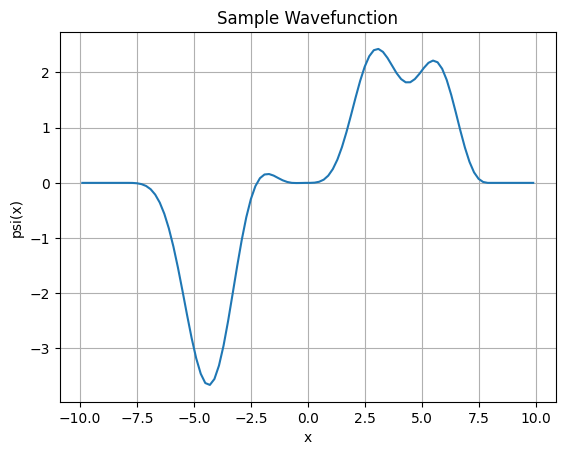

In [5]:
psisample = np.array([0,0,0,0,0,0,0,0,0,0,0,-0.001,-0.007,-0.023,-0.056,-0.115,-0.212,-0.357,
-0.560,-0.826,-1.155,-1.538,-1.960,-2.395,-2.812,-3.178,-3.459,-3.627,-3.661,
-3.554,-3.311,-2.952,-2.506,-2.011,-1.508,-1.035,-0.623,-0.295,-0.059,0.085,
0.152,0.160,0.132,0.088,0.046,0.016,0,-0.003,-0.002,0,0,0.004,0.020,0.058,
0.131,0.250,0.421,0.647,0.922,1.229,1.547,1.848,2.105,2.295,2.404,2.427,2.374,
2.264,2.126,1.988,1.880,1.822,1.823,1.880,1.975,2.084,2.175,2.216,2.185,2.068,
1.866,1.593,1.276,0.947,0.640,0.382,0.191,0.073,0.016,0,0,0,0,0,0,0,0,0,0,0])

plt.plot(xk(L, K), psisample)
plt.title("Sample Wavefunction")
plt.xlabel("x")
plt.ylabel("psi(x)")
plt.grid()
plt.show()

In [6]:
mean_position = (np.conjugate(psisample) @ X @ psisample.T) / (np.conjugate(psisample) @ psisample)

mean_momentum = (np.conjugate(psisample) @ P @ psisample.T) / (np.conjugate(psisample) @ psisample)

STD_position = np.sqrt((np.conjugate(psisample) @ X**2 @ psisample.T) / (np.conjugate(psisample) @ psisample.T) - mean_position**2)

STD_momentum = np.sqrt((np.conjugate(psisample) @ P**2 @ psisample) / (np.conjugate(psisample) @ psisample) - mean_momentum**2)

print("Mean position: ", mean_position)
print("Mean momentum: ", mean_momentum)
print("Standard deviation of position: ", STD_position)
print("Standard deviation of momentum: ", STD_momentum)
# Uncertainty relation
uncertainty = STD_position * STD_momentum
print("Uncertainty: ", uncertainty)
# Theoretical uncertainty
theoretical_uncertainty = 0.5
print("Theoretical uncertainty: ", theoretical_uncertainty)

Mean position:  -0.48708342141796773
Mean momentum:  -5.121647419730713e-19j
Standard deviation of position:  4.379529857027553
Standard deviation of momentum:  3.519583539922117j
Uncertainty:  15.414121197391637j
Theoretical uncertainty:  0.5
